Total number of images: 864


Processing images:   0%|          | 0/5 [00:00<?, ?it/s]

Analyzing datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11TMJ.2018217.v1.4_merged.tif


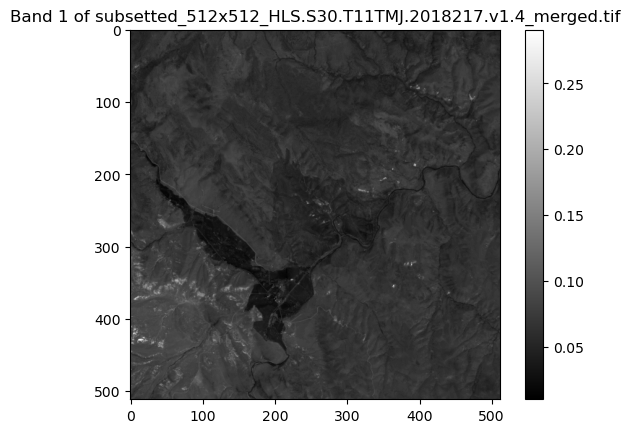

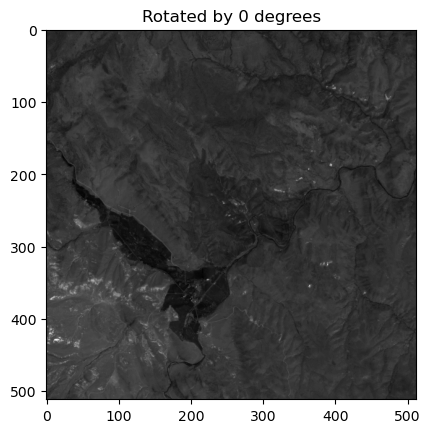

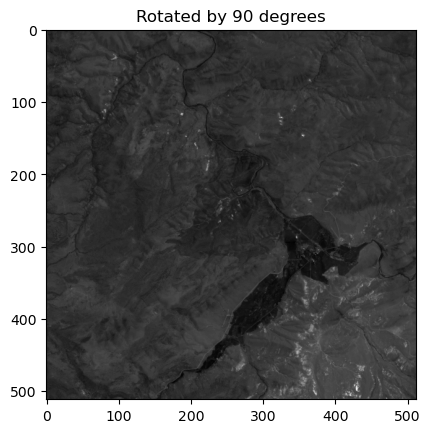

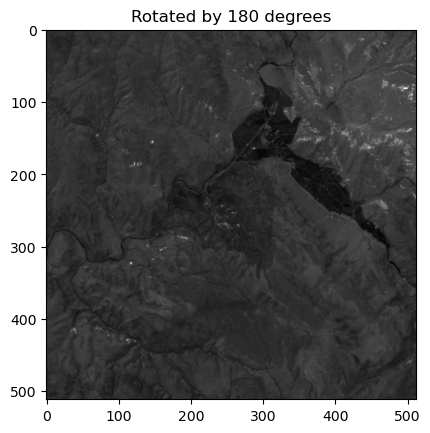

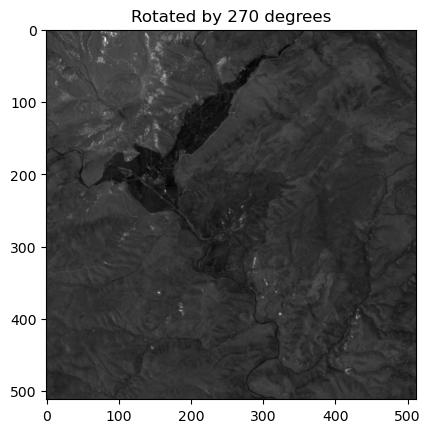

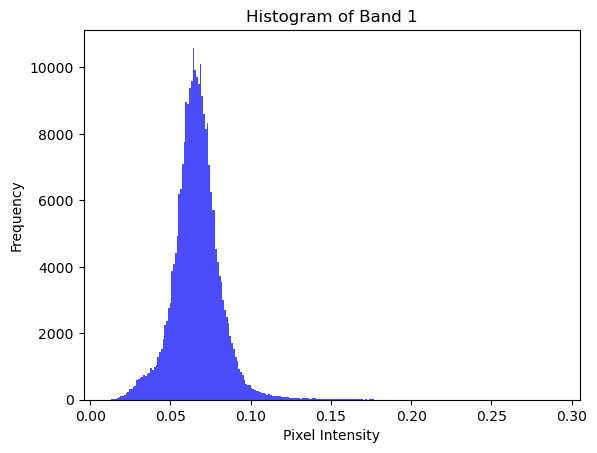

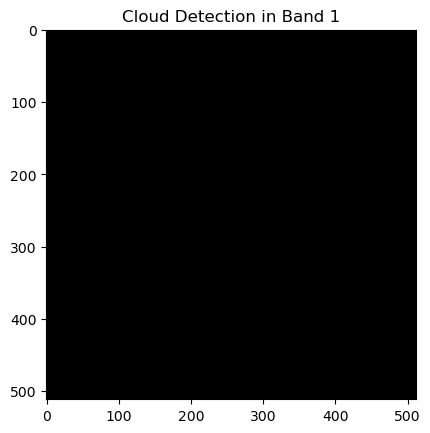

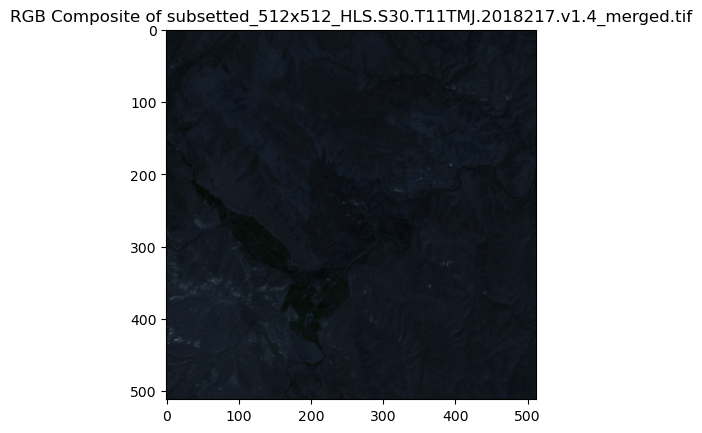

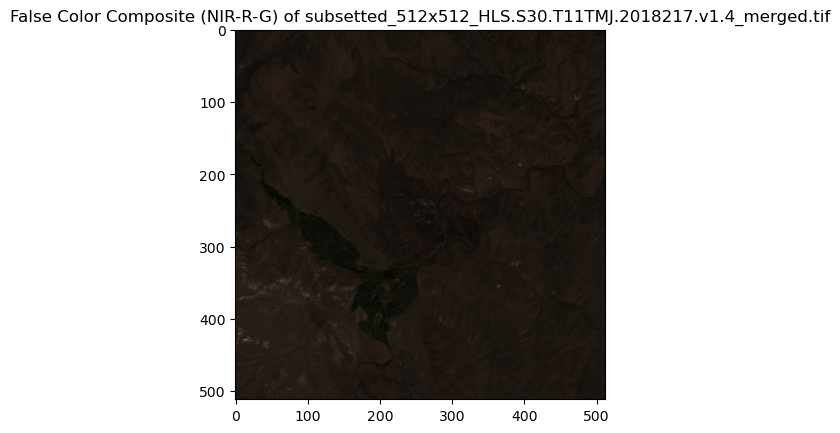

Processing images:  20%|██        | 1/5 [00:02<00:08,  2.03s/it]

Analyzing datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11TQJ.2018219.v1.4_merged.tif


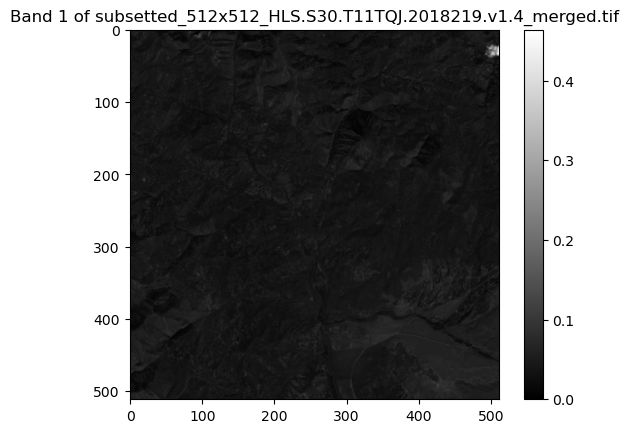

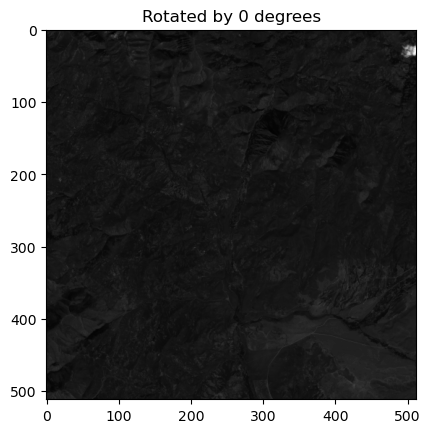

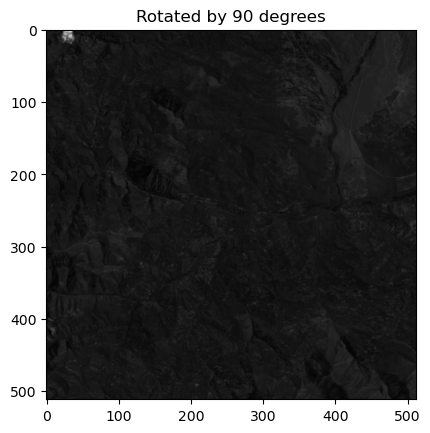

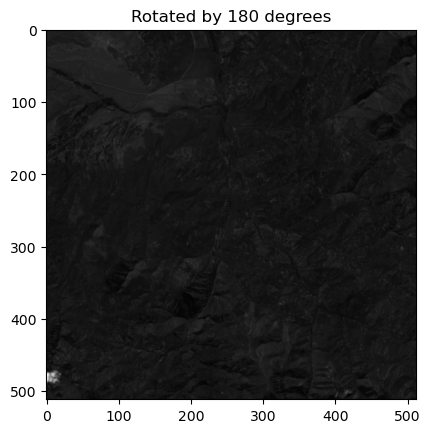

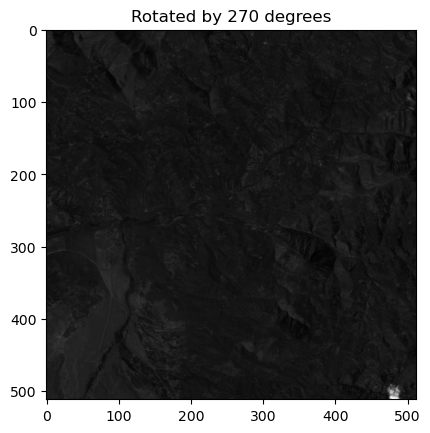

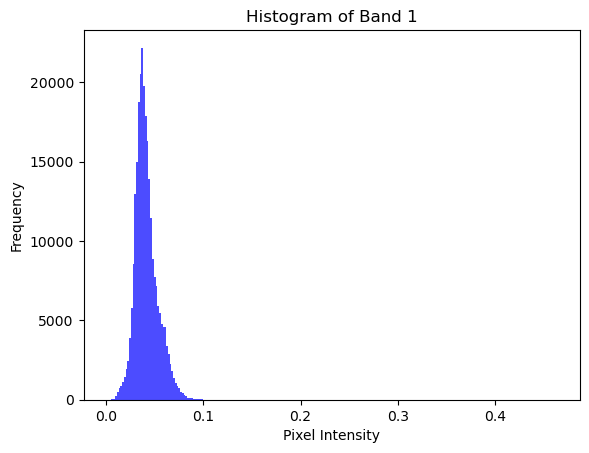

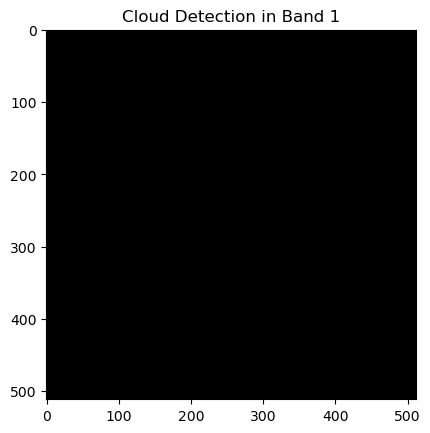

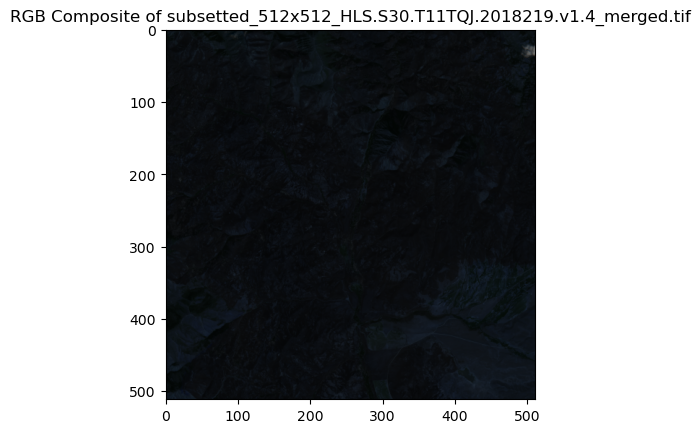

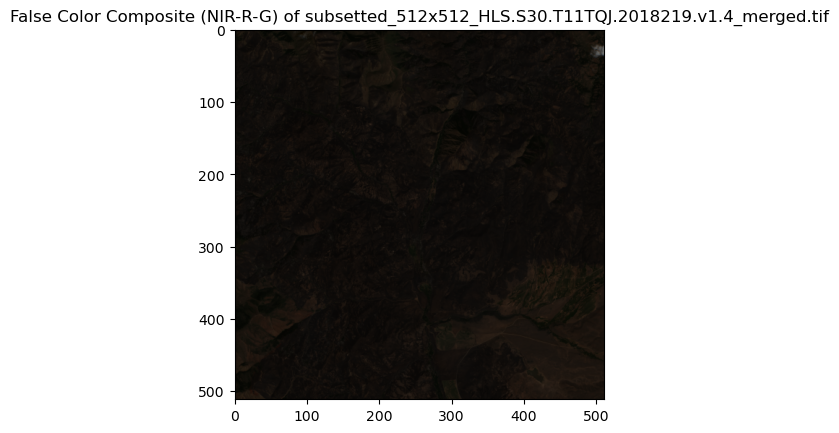

Processing images:  40%|████      | 2/5 [00:04<00:06,  2.03s/it]

Analyzing datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020249.v1.4.mask.tif


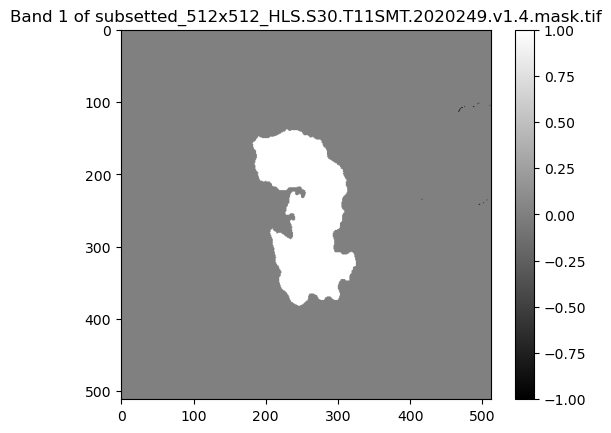

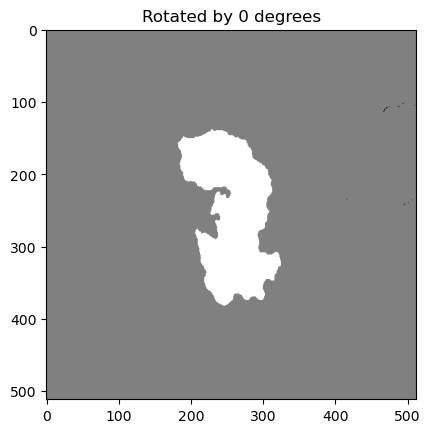

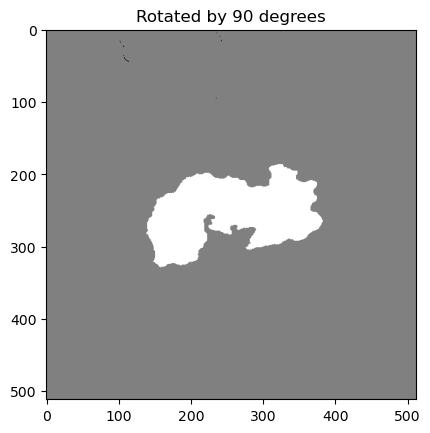

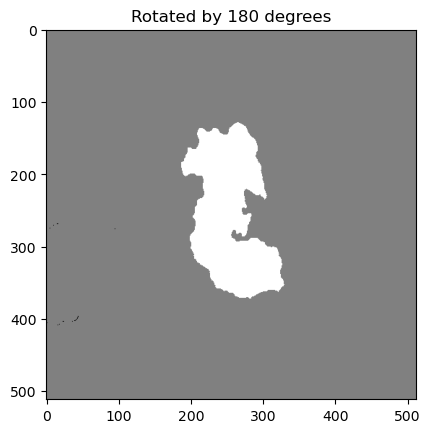

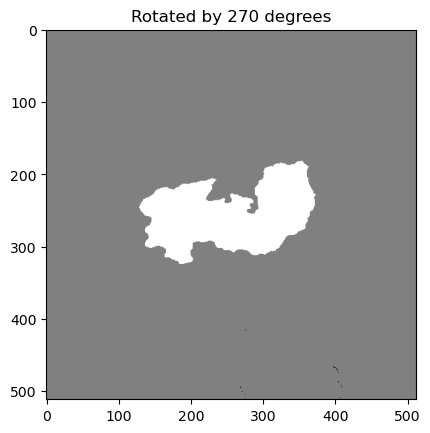

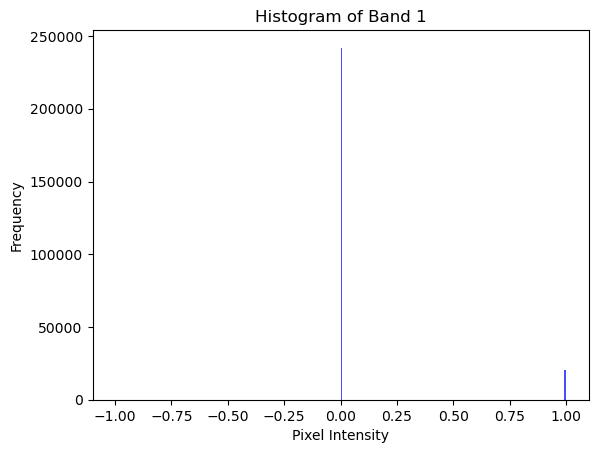

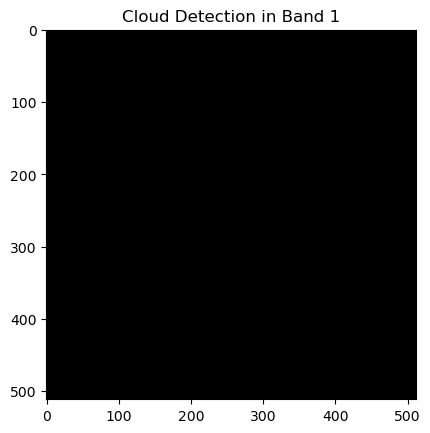

Processing images:  60%|██████    | 3/5 [00:05<00:03,  1.68s/it]

Image datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020249.v1.4.mask.tif doesn't have enough bands for RGB composite.
Image datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020249.v1.4.mask.tif doesn't have enough bands for false color composite.
Analyzing datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020249.v1.4_merged.tif


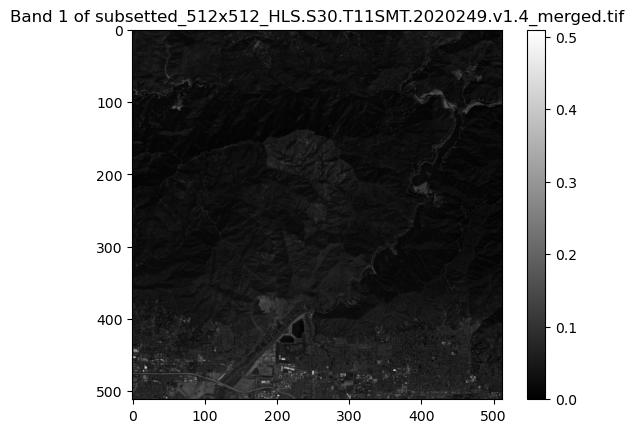

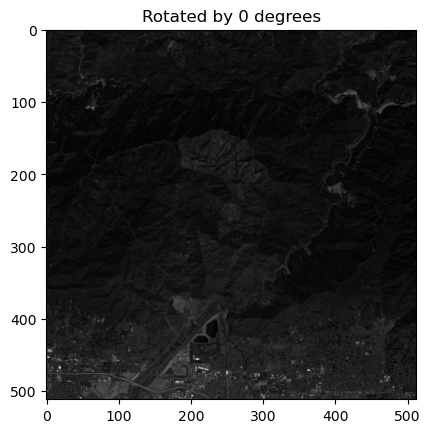

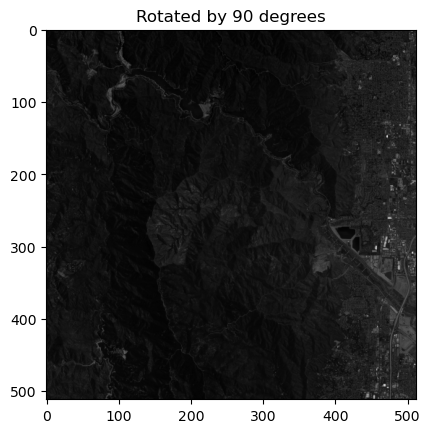

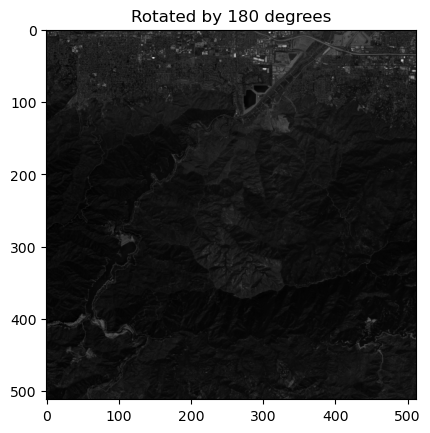

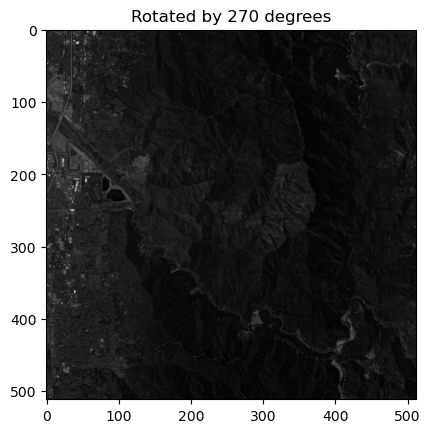

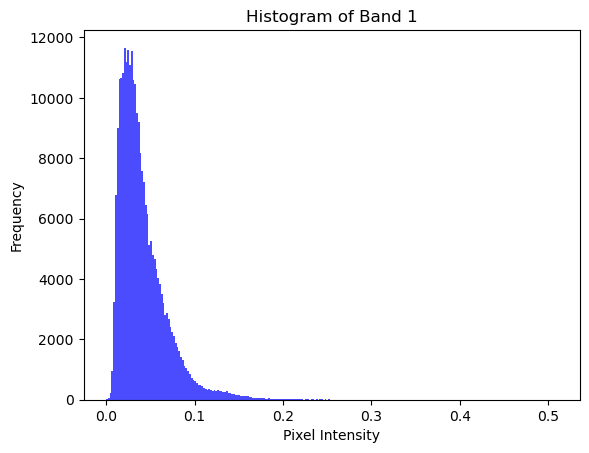

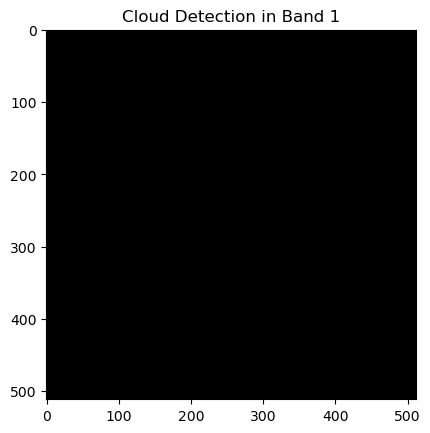

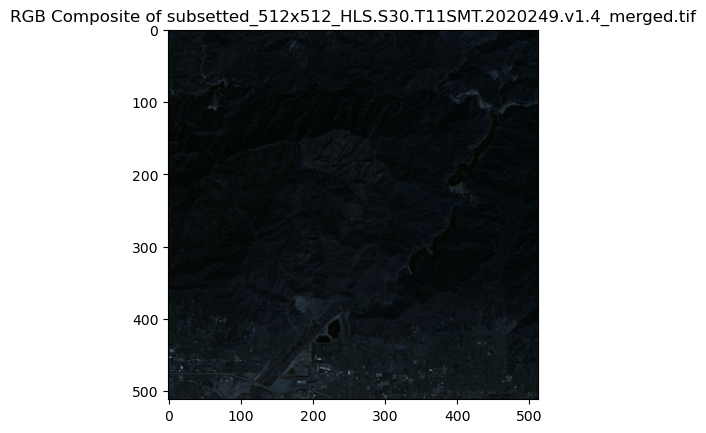

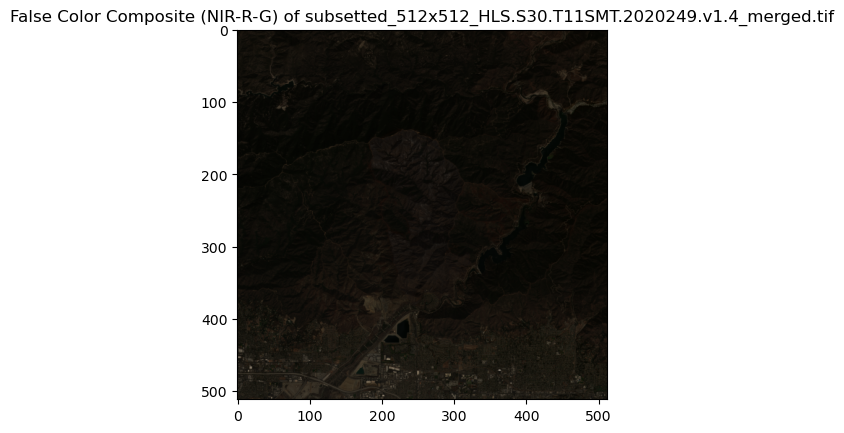

Processing images:  80%|████████  | 4/5 [00:07<00:01,  1.82s/it]

Analyzing datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020289.v1.4.mask.tif


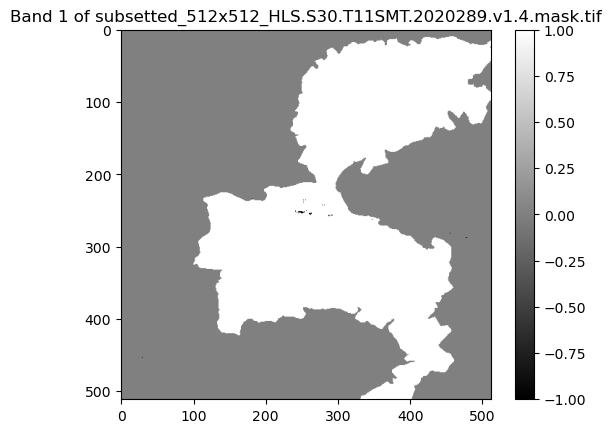

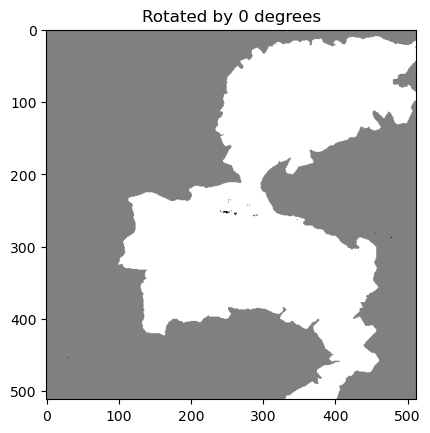

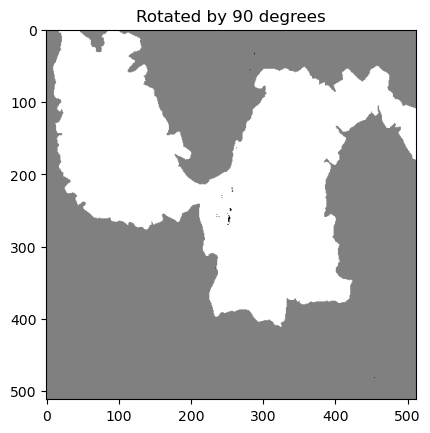

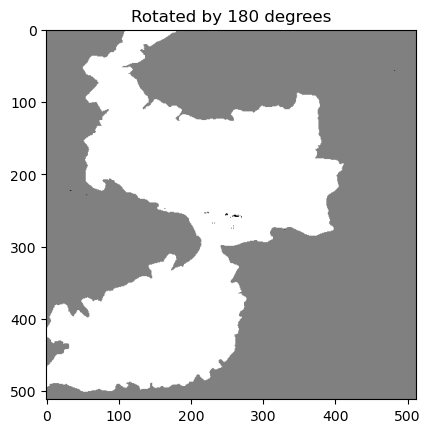

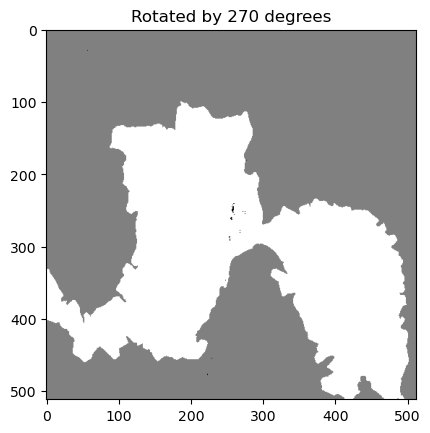

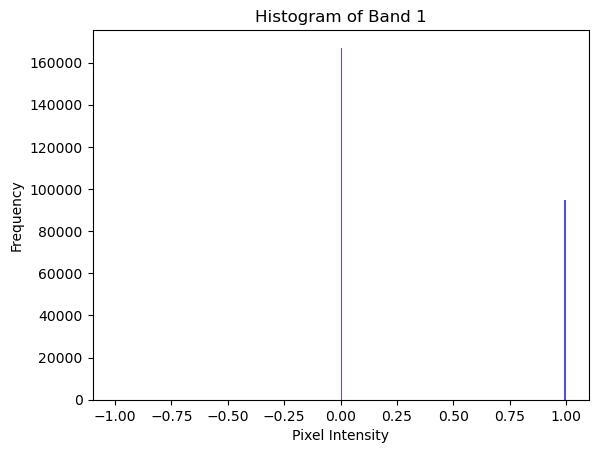

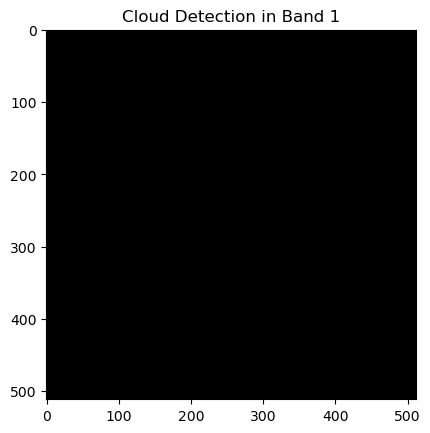

Processing images: 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]

Image datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020289.v1.4.mask.tif doesn't have enough bands for RGB composite.
Image datasets/fire_scars_train_val/train/subsetted_512x512_HLS.S30.T11SMT.2020289.v1.4.mask.tif doesn't have enough bands for false color composite.


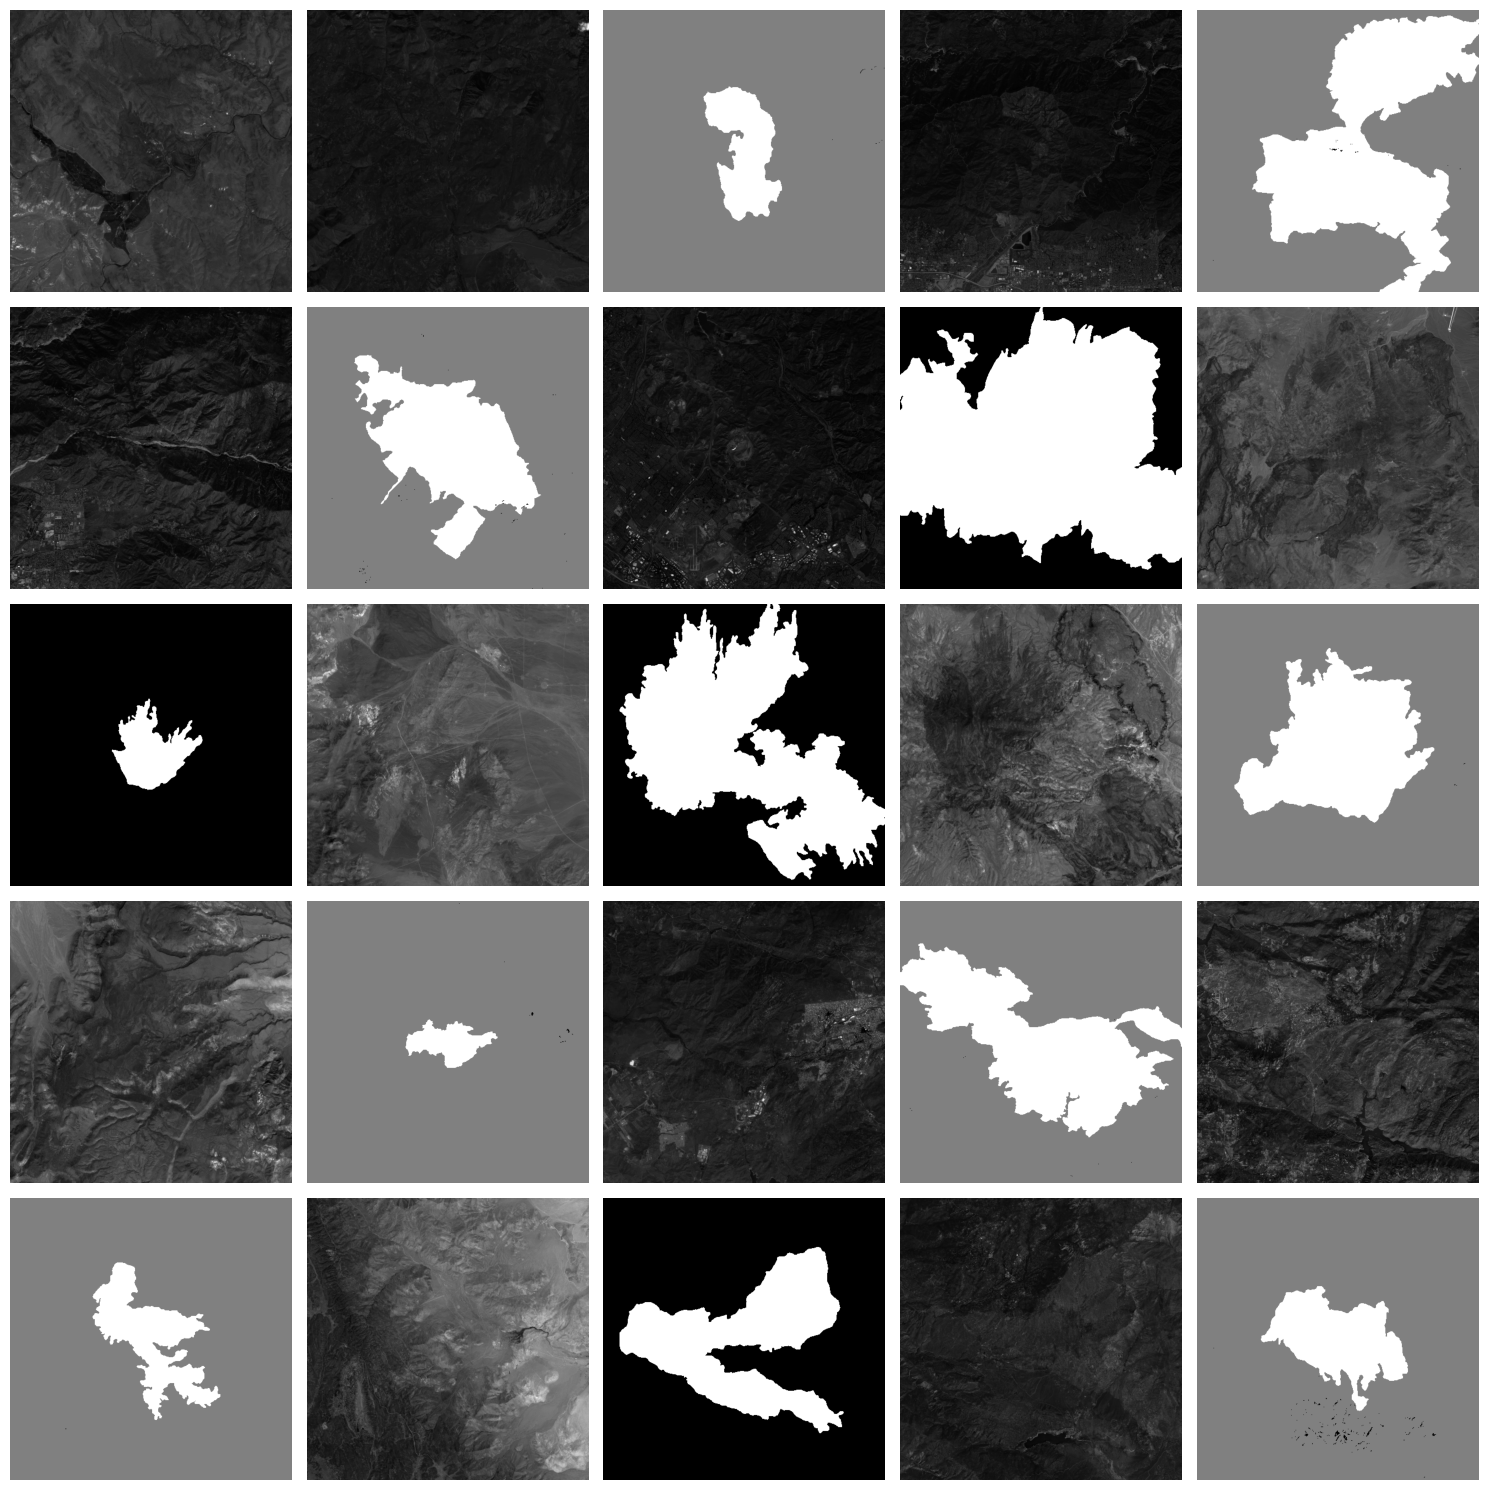

In [2]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from tqdm import tqdm


def display_image_band(image_file, band_num=1, cmap='gray'):
    with rasterio.open(image_file) as img:
        band_data = img.read(band_num)
        plt.imshow(band_data, cmap=cmap)
        plt.colorbar()
        plt.title(f"Band {band_num} of {os.path.basename(image_file)}")
        plt.show()


def rotate_image_and_visualize(image_file, angles=[0, 90, 180, 270]):
    with rasterio.open(image_file) as img:
        for angle in angles:
            img_data = img.read(1)
            rotated_img = np.rot90(img_data, angle // 90)
            plt.imshow(rotated_img, cmap='gray')
            plt.title(f"Rotated by {angle} degrees")
            plt.show()


def plot_histogram(image_file, band_num=1):
    with rasterio.open(image_file) as img:
        band_data = img.read(band_num)
        plt.hist(band_data.ravel(), bins=256, color='blue', alpha=0.7)
        plt.title(f"Histogram of Band {band_num}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()


def detect_clouds_visualization(image_file, band_num=1, threshold=200):
    with rasterio.open(image_file) as img:
        band_data = img.read(band_num)
        cloud_mask = band_data > threshold  
        plt.imshow(cloud_mask, cmap='gray')
        plt.title(f"Cloud Detection in Band {band_num}")
        plt.show()


def visualize_rgb_composite(image_file):
    with rasterio.open(image_file) as img:
        if img.count < 3:
            print(f"Image {image_file} doesn't have enough bands for RGB composite.")
            return
        r = img.read(1)  
        g = img.read(2)  
        b = img.read(3)  
        rgb = np.stack([r, g, b], axis=-1)
        plt.imshow(rgb)
        plt.title(f"RGB Composite of {os.path.basename(image_file)}")
        plt.show()


def visualize_false_color_composite(image_file):
    with rasterio.open(image_file) as img:
        if img.count < 3:
            print(f"Image {image_file} doesn't have enough bands for false color composite.")
            return
        
        nir = img.read(3)
        red = img.read(2)
        green = img.read(1)
        false_color = np.stack([nir, red, green], axis=-1)
        plt.imshow(false_color)
        plt.title(f"False Color Composite (NIR-R-G) of {os.path.basename(image_file)}")
        plt.show()


def create_image_montage(image_files, ncols=5, nrows=5, band_num=1):
    plt.figure(figsize=(15, 15))
    for i, img_file in enumerate(image_files[:ncols * nrows]):
        with rasterio.open(img_file) as img:
            band_data = img.read(band_num)
            plt.subplot(nrows, ncols, i + 1)
            plt.imshow(band_data, cmap='gray')
            plt.axis('off')
    plt.tight_layout()
    plt.show()


def analyze_and_visualize_images(directory):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.tif')]
    total_images = len(image_files)

    if total_images == 0:
        print("No .tif images found in the directory.")
        return

    print(f"Total number of images: {total_images}")

    
    for img_file in tqdm(image_files[:5], desc="Processing images"):
        print(f"Analyzing {img_file}")

        
        display_image_band(img_file, band_num=1)  
        
        
        rotate_image_and_visualize(img_file, angles=[0, 90, 180, 270])

        
        plot_histogram(img_file, band_num=1)

        
        detect_clouds_visualization(img_file, band_num=1, threshold=200)

        
        visualize_rgb_composite(img_file)

        
        visualize_false_color_composite(img_file)

    
    create_image_montage(image_files, ncols=5, nrows=5, band_num=1)


image_directory = 'datasets/fire_scars_train_val/train/'  


analyze_and_visualize_images(image_directory)

Total number of images: 864


Processing images: 100%|██████████| 100/100 [00:00<00:00, 108.51it/s]



--- Dataset Summary ---
Average image size: [512. 512.] (Height, Width)
Average number of bands per image: 3.55
Mean pixel value (across all bands and images): 0.15345791770328937
Standard deviation of pixel values: 0.07753169473357793


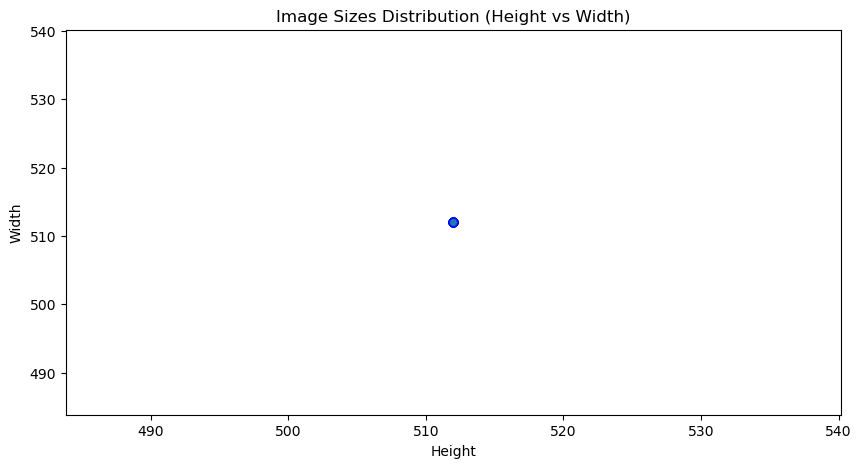

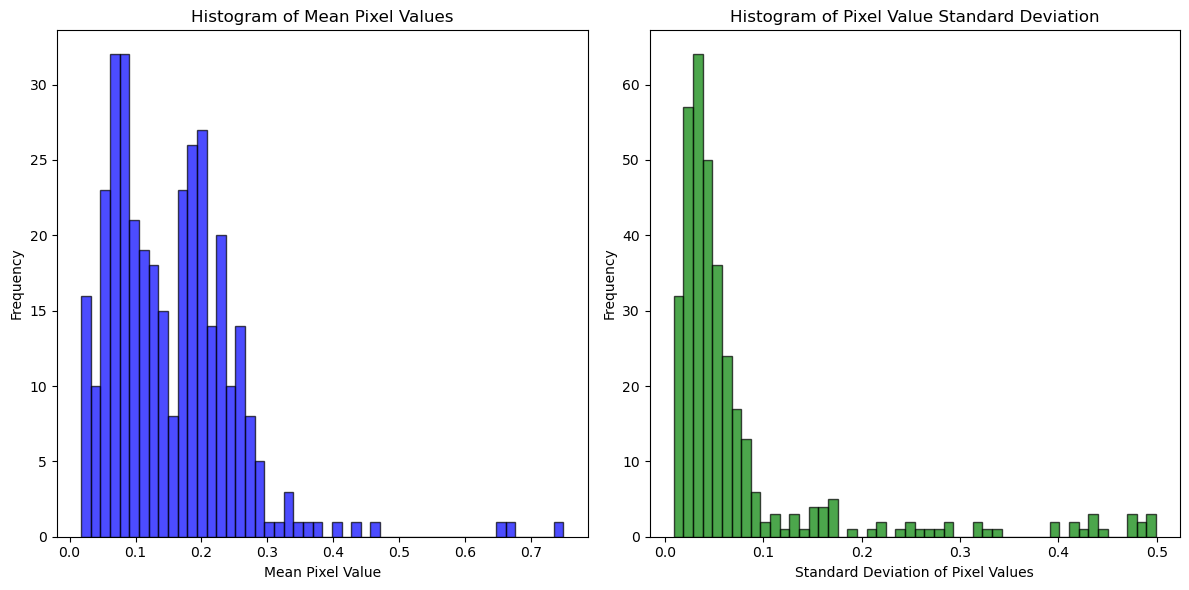

In [3]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm


def analyze_image_dataset(directory, analyze_sample_size=100):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.tif')]
    total_images = len(image_files)

    if total_images == 0:
        print("No .tif images found in the directory.")
        return

    print(f"Total number of images: {total_images}")
    
    
    stats = {'image_sizes': [], 'bands': [], 'mean_pixel_values': [], 'std_pixel_values': []}
    
    for img_file in tqdm(image_files[:analyze_sample_size], desc="Processing images"):
        with rasterio.open(img_file) as img:
            
            stats['image_sizes'].append((img.height, img.width))
            stats['bands'].append(img.count)
            
            
            for i in range(1, img.count + 1):
                band_data = img.read(i)
                stats['mean_pixel_values'].append(np.mean(band_data))
                stats['std_pixel_values'].append(np.std(band_data))
    
    
    print("\n--- Dataset Summary ---")
    print(f"Average image size: {np.mean(stats['image_sizes'], axis=0)} (Height, Width)")
    print(f"Average number of bands per image: {np.mean(stats['bands'])}")
    print(f"Mean pixel value (across all bands and images): {np.mean(stats['mean_pixel_values'])}")
    print(f"Standard deviation of pixel values: {np.mean(stats['std_pixel_values'])}")
    
    
    sizes = np.array(stats['image_sizes'])
    plt.figure(figsize=(10, 5))
    plt.scatter(sizes[:, 0], sizes[:, 1], alpha=0.5, edgecolors="b")
    plt.title('Image Sizes Distribution (Height vs Width)')
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.show()

    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(stats['mean_pixel_values'], bins=50, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Histogram of Mean Pixel Values')
    plt.xlabel('Mean Pixel Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(stats['std_pixel_values'], bins=50, color='green', edgecolor='black', alpha=0.7)
    plt.title('Histogram of Pixel Value Standard Deviation')
    plt.xlabel('Standard Deviation of Pixel Values')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


image_directory = 'datasets/fire_scars_train_val/train/'  
analyze_image_dataset(image_directory, analyze_sample_size=100)

In [ ]:
import numpy as np
import rasterio
import glob

def calculate_mean_std(image_paths, bands):
    # Initialize accumulators for the sum and sum of squares
    total_sum = np.zeros(len(bands))
    total_sum_squared = np.zeros(len(bands))
    total_pixels = 0

    # Loop through each image path
    for image_path in image_paths:
        with rasterio.open(image_path) as src:
            # Read the specified bands
            image_data = src.read(bands)  # shape: (bands, height, width)
            image_data = image_data.reshape(len(bands), -1)  # Flatten the bands
            
            # Accumulate the pixel values and the squared pixel values
            total_sum += np.sum(image_data, axis=1)
            total_sum_squared += np.sum(image_data ** 2, axis=1)
            total_pixels += image_data.shape[1]
    
    # Calculate the mean and standard deviation
    mean = total_sum / total_pixels
    std = np.sqrt((total_sum_squared / total_pixels) - (mean ** 2))
    
    return mean, std

# Set the path to the directory containing your .tif images
image_dir = "datasets/fire_scars_train_val/train"

# Get all .tif image file paths
image_paths = glob.glob(image_dir + "/*.tif")

# Specify the bands you're interested in (e.g., [1, 2, 3, 4, 5, 6])
bands = [1, 2, 3, 4, 5, 6]

# Calculate the mean and standard deviation
mean, std = calculate_mean_std(image_paths, bands)

print("Mean:", mean)
print("Standard Deviation:", std)